### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Importing constants and functions

In [2]:
from constants import add_value_labels, arange_y_ticks, arange_x_ticks, arange_subplots_labels
from constants import regions, figsize, fonsize_title, fonsize_x, fonsize_y, fonsize_label, layout, title_color, sort_order

### Loading data

In [3]:
sales=pd.read_csv("\\Datasets and Projects\\SALES\\Data\\Processed\\Sales Dataset(processed data).csv")
sales.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order ID,Order Date,Order Year,Order Month,Order Day,...,Ship Day,Delivery time,Units Sold,Unit Price,Unit Cost,Unit Profit,Total Revenue,Total Cost,Total Profit,Profitability
0,Central America and the Caribbean,Cuba,Fruits,Online,L,978111779,2010-01-01,2010,January,Friday,...,Saturday,1 days,3866,9.33,6.92,2.41,36069.78,26752.72,9317.06,34.83
1,Middle East and North Africa,Iraq,Household,Offline,M,899159562,2010-01-01,2010,January,Friday,...,Friday,28 days,151,668.27,502.54,165.73,100908.77,75883.54,25025.23,32.98
2,Europe,Germany,Snacks,Online,M,936589038,2010-01-01,2010,January,Friday,...,Wednesday,40 days,6364,152.58,97.44,55.14,971019.12,620108.16,350910.96,56.59
3,Asia,Turkmenistan,Office Supplies,Online,M,192446839,2010-01-01,2010,January,Friday,...,Thursday,13 days,8151,651.21,524.96,126.25,5308012.71,4278948.96,1029063.75,24.05
4,Central America and the Caribbean,Dominica,Snacks,Online,C,649669063,2010-01-01,2010,January,Friday,...,Saturday,36 days,368,152.58,97.44,55.14,56149.44,35857.92,20291.52,56.59


# Data exploration

### 1.1 Total revenue and profit by region

In [4]:
by_region_total=sales.groupby(['Region'], as_index=False).agg({'Total Revenue':'sum','Total Profit':'sum' })

In [5]:
by_region_total

,Region,Total Revenue,Total Profit
0,Asia,3.889240e+11,1.146632e+11
1,Australia and Oceania,2.154792e+11,6.363852e+10
2,Central America and the Caribbean,2.882162e+11,8.502018e+10
3,Europe,6.894046e+11,2.034898e+11
4,Middle East and North Africa,3.310458e+11,9.775268e+10
5,North America,5.742768e+10,1.694772e+10
6,Sub-Saharan Africa,6.914492e+11,2.040205e+11


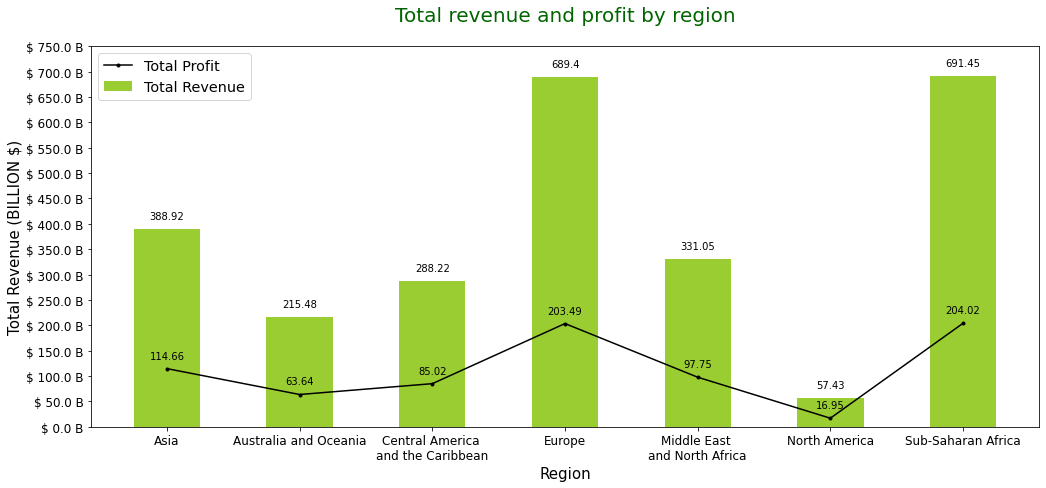

In [6]:
plt.figure(figsize = figsize)
plt.title('Total revenue and profit by region', fontsize = fonsize_title, color = title_color, y = layout)

plt.bar(by_region_total['Region'], by_region_total['Total Revenue'], color='#9ACD32', width=0.5, label='Total Revenue')
plt.plot(by_region_total['Region'], by_region_total['Total Profit'], color='black', marker = '.', label='Total Profit')

plt.ylabel('Total Revenue (BILLION $)', fontsize=fonsize_label)
plt.xlabel('Region', fontsize=fonsize_label)

add_value_labels(by_region_total['Region'], by_region_total['Total Revenue'])
add_value_labels(by_region_total['Region'], by_region_total['Total Profit'])

arange_y_ticks(7.5)
arange_x_ticks(regions)

plt.legend(fontsize= 'x-large')

plt.show()

### 1.2 Total revenue by region

In [7]:
by_region=sales.groupby(['Region', 'Sales Channel'], as_index=False)['Total Revenue'].sum()

In [8]:
by_region

,Region,Sales Channel,Total Revenue
0,Asia,Offline,1.944051e+11
1,Asia,Online,1.945189e+11
2,Australia and Oceania,Offline,1.078316e+11
3,Australia and Oceania,Online,1.076476e+11
4,Central America and the Caribbean,Offline,1.443903e+11
5,Central America and the Caribbean,Online,1.438259e+11
6,Europe,Offline,3.449940e+11
7,Europe,Online,3.444106e+11
8,Middle East and North Africa,Offline,1.659086e+11
9,Middle East and North Africa,Online,1.651372e+11


In [9]:
filt = by_region['Sales Channel'] == 'Online'
online=by_region.loc[filt]['Total Revenue']

filt_1 = by_region['Sales Channel'] == 'Offline'
offline=by_region.loc[filt_1]['Total Revenue']

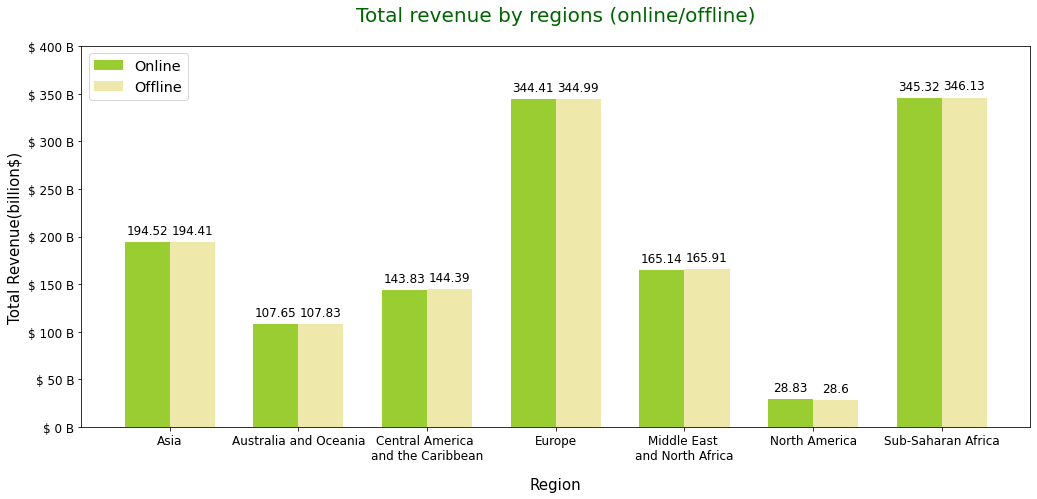

In [10]:
fig, ax = plt.subplots(figsize=figsize)
plt.title('Total revenue by regions (online/offline)', fontsize=fonsize_title, color=title_color, y=layout)

x = arange_x_ticks(regions)

width = 0.35
rects1 = plt.bar(x - width/2, online, width, label='Online', color='#9ACD32')
rects2 = plt.bar(x + width/2, offline, width , label='Offline', color='#EEE8AA')

plt.ylabel('Total Revenue(billion$)', fontsize=fonsize_label, labelpad=6)
plt.xlabel('Region', fontsize=15, labelpad=fonsize_label)

arange_y_ticks(4)
arange_subplots_labels(ax)

plt.legend(fontsize= 'x-large')

plt.show()

### 1.3 Total revenue by year

In [11]:
by_year=sales.groupby(['Order Year'], as_index=False)['Total Revenue'].sum()

In [12]:
by_year

,Order Year,Total Revenue
0,2010,2.492900e+11
1,2011,2.493973e+11
2,2012,2.480496e+11
3,2013,2.486922e+11
4,2014,2.492325e+11
5,2015,2.491455e+11
6,2016,2.484348e+11
7,2017,2.486039e+11
8,2018,2.497632e+11
9,2019,2.485903e+11


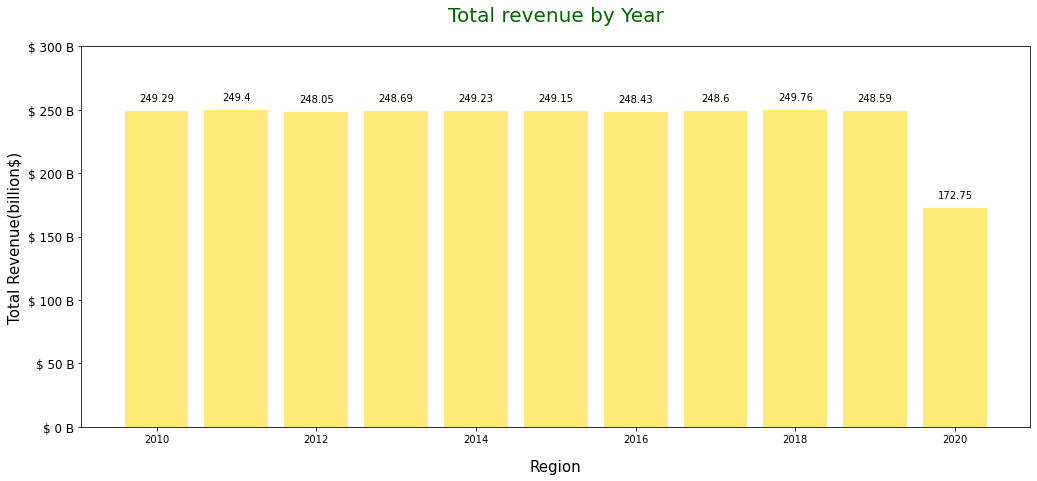

In [13]:
plt.figure(figsize = figsize)
plt.title('Total revenue by Year', fontsize=fonsize_title, color=title_color, y = layout)

plt.bar(by_year['Order Year'], by_year['Total Revenue'], color='#FFEA7A')

plt.ylabel('Total Revenue(billion$)', fontsize=fonsize_label, labelpad=6)
plt.xlabel('Region', fontsize=15, labelpad=fonsize_label)
           
add_value_labels(by_year['Order Year'], by_year['Total Revenue'])
arange_y_ticks(3)

plt.show()

### 1.4 Total revenue by Years and Region

In [14]:
by_years=pd.DataFrame(sales.groupby(['Region', 'Order Year']).agg({'Total Revenue':'sum'}))
by_years=by_years.unstack(level=0)

In [15]:
by_years.head()

Total Revenue                        \
Region              Asia Australia and Oceania   
Order Year                                       
2010        3.627704e+10          2.016547e+10   
2011        3.662842e+10          2.026397e+10   
2012        3.626126e+10          1.989975e+10   
2013        3.645061e+10          2.011599e+10   
2014        3.650648e+10          2.014393e+10   

                                                            \
Region     Central America and the Caribbean        Europe   
Order Year                                                   
2010                            2.712285e+10  6.429528e+10   
2011                            2.720597e+10  6.485841e+10   
2012                            2.686072e+10  6.426308e+10   
2013                            2.695547e+10  6.450076e+10   
2014                            2.694834e+10  6.449573e+10   

                                                                          
Region     Middle East and North Africa North America Sub-Saharan Africa  
Order Year                                                                
2010                       3.102256e+10  5.344534e+09       6.506224e+10  
2011                       3.067620e+10  5.315691e+09       6.444860e+10  
2012                       3.091898e+10  5.358910e+09       6.448692e+10  
2013                       3.090284e+10  5.366431e+09       6.440005e+10  
2014                       3.076955e+10  5.496169e+09       6.487231e+10

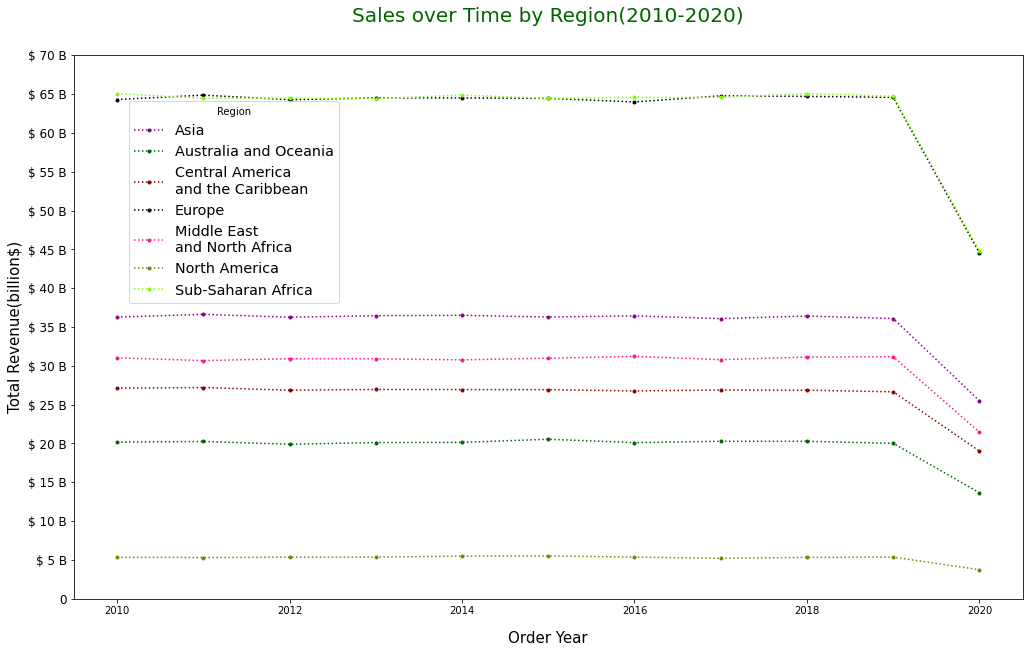

In [16]:
colors=['#8B008B', '#006400', '#8B0000', '#000000', '#FF1493', '#808000', '#7FFF00']
labels = regions

by_years.plot(figsize=(17, 10), color=colors, marker = '.', linestyle = 'dotted', label=labels)

plt.title('Sales over Time by Region(2010-2020)', fontsize=fonsize_title, color=title_color, y=layout)
plt.ylabel('Total Revenue(billion$)', fontsize=fonsize_label, labelpad=6)
plt.xlabel('Order Year', fontsize=15, labelpad=fonsize_label)

plt.yticks(np.arange(0, 70000000001, step=5000000000), [0, '$ 5 B', '$ 10 B','$ 15 B','$ 20 B','$ 25 B','$ 30 B','$ 35 B','$ 40 B','$ 45 B','$ 50 B','$ 55 B','$ 60 B','$ 65 B', '$ 70 B'], fontsize=fonsize_y)
plt.legend(loc='center left', bbox_to_anchor=(0.05, 0.73), fontsize= 'x-large', title='Region', labels=labels)

plt.show()

### 1.5.1 Total revenue by Month

In [17]:
by_month=sales.groupby(['Order Month'], as_index=False).agg({'Total Revenue':'sum','Total Profit':'sum' })
by_month.index=pd.CategoricalIndex(by_month['Order Month'], categories=sort_order, ordered=True)
by_month=by_month.sort_index().reset_index(drop=True)

In [18]:
by_month

,Order Month,Total Revenue,Total Profit
0,January,2.331460e+11,6.872992e+10
1,February,2.108600e+11,6.231683e+10
2,March,2.328038e+11,6.870505e+10
3,April,2.247084e+11,6.636019e+10
4,May,2.324190e+11,6.854345e+10
5,June,2.246122e+11,6.629988e+10
6,July,2.315608e+11,6.851156e+10
7,August,2.322636e+11,6.858358e+10
8,September,2.117241e+11,6.245806e+10
9,October,2.117606e+11,6.237415e+10


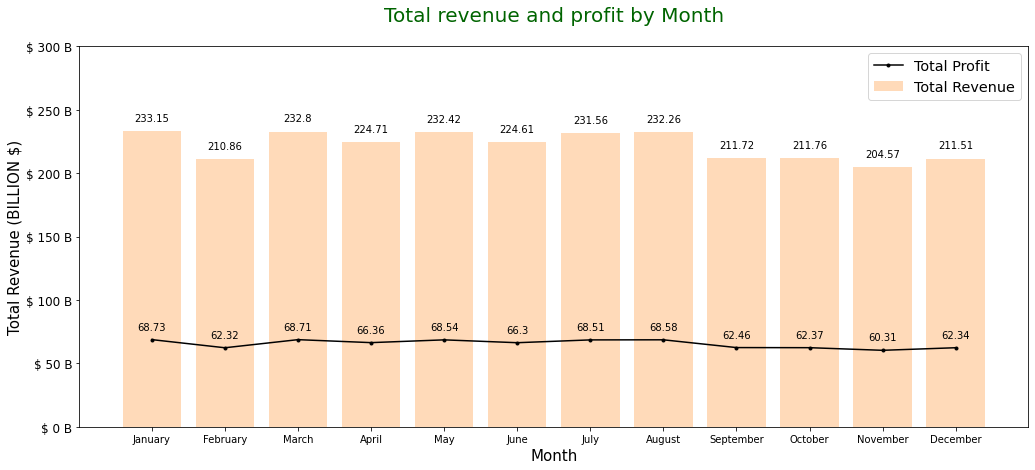

In [19]:
plt.figure(figsize = figsize)
plt.title('Total revenue and profit by Month', fontsize = fonsize_title, color = title_color, y = layout)

plt.bar(by_month['Order Month'], by_month['Total Revenue'], color='#FFDAB9', label='Total Revenue')
plt.plot(by_month['Order Month'], by_month['Total Profit'], color='black', marker = '.', label='Total Profit')

plt.ylabel('Total Revenue (BILLION $)', fontsize=fonsize_label)
plt.xlabel('Month', fontsize=fonsize_label)

add_value_labels(by_month['Order Month'], by_month['Total Revenue'])
add_value_labels(by_month['Order Month'], by_month['Total Profit'])

arange_y_ticks(3)
plt.legend(fontsize= 'x-large')

plt.show()

### 2 By product type

### 2.1 By Year and region

In [20]:
by_item_type=sales.groupby(['Region', 'Order Year', 'Item Type'], as_index=False)['Total Revenue'].sum()

In [21]:
by_item_type

,Region,Order Year,Item Type,Total Revenue
0,Asia,2010,Baby Food,2.990328e+09
1,Asia,2010,Beverages,5.378718e+08
2,Asia,2010,Cereal,2.337360e+09
3,Asia,2010,Clothes,1.252168e+09
4,Asia,2010,Cosmetics,4.919464e+09
...,...,...,...,...
919,Sub-Saharan Africa,2020,Meat,5.961543e+09
920,Sub-Saharan Africa,2020,Office Supplies,9.022645e+09
921,Sub-Saharan Africa,2020,Personal Care,1.135223e+09
922,Sub-Saharan Africa,2020,Snacks,2.106901e+09


In [22]:
max_value=by_item_type['Total Revenue'].max()
min_value=by_item_type['Total Revenue'].min()
print(max_value, min_value)

13685300180.73 10340644.26


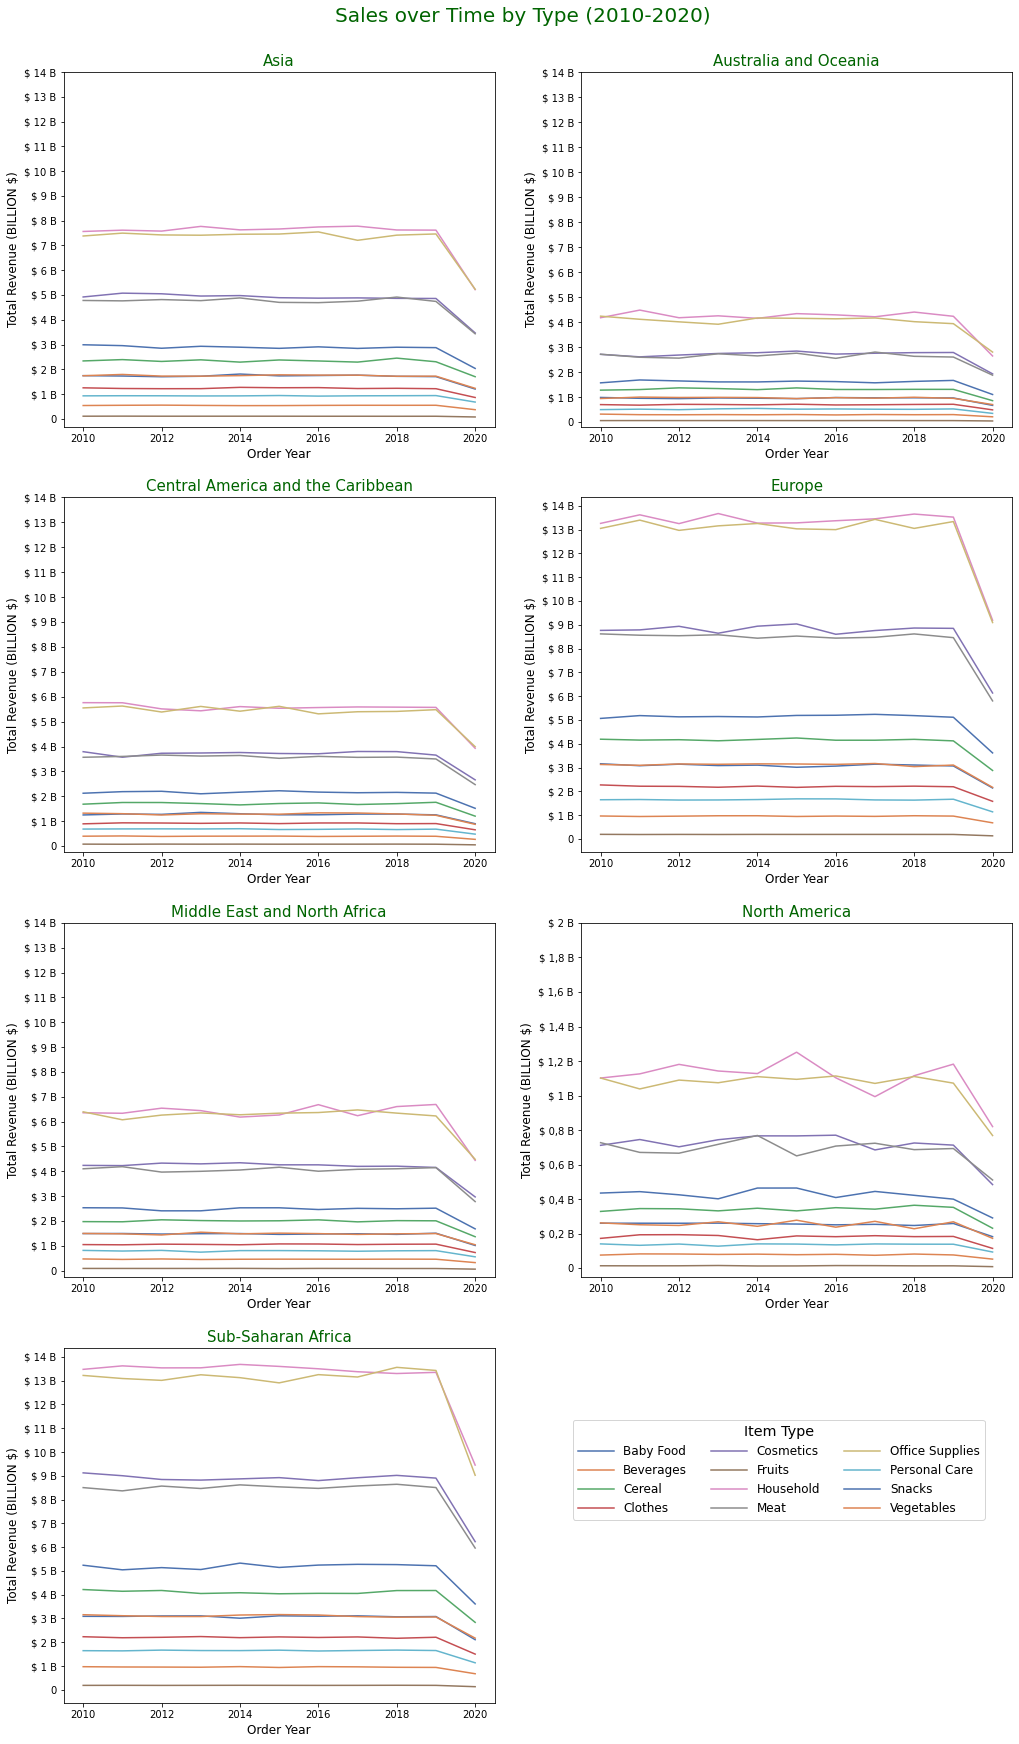

In [23]:
plt.figure(figsize=(17, 30))

palette = sns.color_palette("deep", 12)
regions = list(by_item_type['Region'].unique())
for  i, region in enumerate(regions):
    xpoint = by_item_type.query("Region == '{}'".format(region))
    plt.subplot(4,2,i+1)
    ax = sns.lineplot(data=xpoint, x="Order Year", y="Total Revenue", hue="Item Type", palette=palette)
    ax.get_legend().remove()
    plt.title(region, fontsize=fonsize_label, color=title_color)
    plt.xlabel('Order Year', fontsize=fonsize_y)
    plt.ylabel('Total Revenue (BILLION $)', fontsize=fonsize_y)
    
    if region == 'North America':
        plt.yticks(np.arange(0, 2000000001, step=200000000), ['0', '$ 0,2 B', '$ 0,4 B', '$ 0,6 B', '$ 0,8 B', '$ 1 B',
                                                        '$ 1,2 B', '$ 1,4 B', '$ 1,6 B', '$ 1,8 B', 
                                                        '$ 2 B'])
        
    else:
        plt.yticks(np.arange(0, 14000000001, step=1000000000), ['0', '$ 1 B', '$ 2 B', '$ 3 B', '$ 4 B', '$ 5 B',
                                                        '$ 6 B', '$ 7 B', '$ 8 B','$ 9 B', '$ 10 B', 
                                                        '$ 11 B', '$ 12 B', '$ 13 B', '$ 14 B'])
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, loc='lower right', ncol=3, title='Item Type', bbox_to_anchor=(2.15, 0.5), fontsize='large',
           title_fontsize='x-large', handlelength=3)        
plt.suptitle('Sales over Time by Type (2010-2020)', fontsize=fonsize_title, color=title_color, y=0.91)

plt.show()

### 2.2 Total Revenue in in percentages

In [42]:
sizes=sales.groupby(['Item Type'])['Total Revenue'].sum()

In [43]:
sizes

Item Type
Baby Food          2.134168e+11
Beverages          3.958750e+10
Cereal             1.711774e+11
Clothes            9.106691e+10
Cosmetics          3.651058e+11
Fruits             7.767802e+09
Household          5.558542e+11
Meat               3.513592e+11
Office Supplies    5.428969e+11
Personal Care      6.816922e+10
Snacks             1.272525e+11
Vegetables         1.282924e+11
Name: Total Revenue, dtype: float64

In [46]:
labels = ['Baby Food', 'Beverages', 'Cereal', 'Clothes', 'Cosmetics', 'Fruits', 'Household', 'Meat', 'Office Supplies',
          'Personal Care', 'Snacks', 'Vegetables']

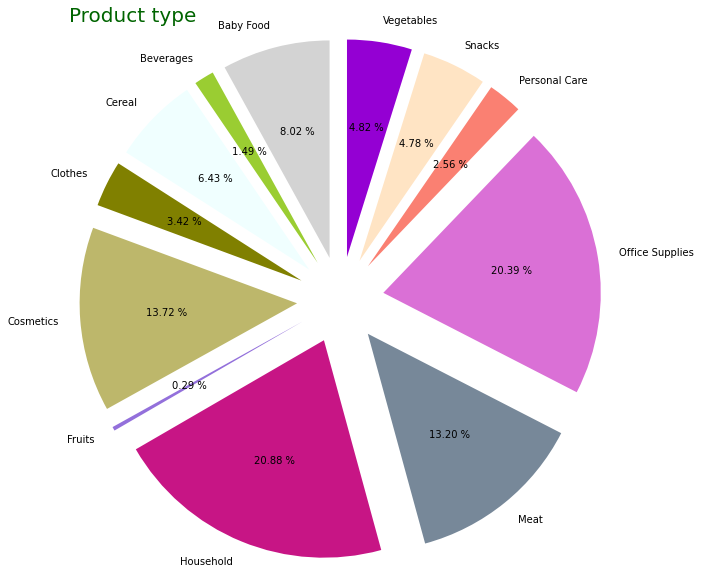

In [47]:
plt.figure(figsize=(15,10))

explode=[0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]

import random
import matplotlib.colors as mcolors
colors = random.choices(list(mcolors.CSS4_COLORS.values()),k = 12)

plt.pie(sizes, labels = labels, startangle = 90, explode=explode, colors=colors, autopct='%.2f %%')
plt.title('Product type', fontsize=fonsize_title, color=title_color, loc='left')

plt.show()

### 2.3 Economic indicators of item types

In [26]:
by_item_type=sales[['Item Type', 'Unit Price', 'Unit Cost', 'Unit Profit', 'Profitability']]
by_item_type=by_item_type.drop_duplicates(subset='Item Type', keep='last', ignore_index=True)
by_item_type.sort_values(by=['Item Type'], inplace=True, ascending=True, ignore_index=True)

In [27]:
by_item_type

,Item Type,Unit Price,Unit Cost,Unit Profit,Profitability
0,Baby Food,255.28,159.42,95.86,60.13
1,Beverages,47.45,31.79,15.66,49.26
2,Cereal,205.70,117.11,88.59,75.65
3,Clothes,109.28,35.84,73.44,204.91
4,Cosmetics,437.20,263.33,173.87,66.03
5,Fruits,9.33,6.92,2.41,34.83
6,Household,668.27,502.54,165.73,32.98
7,Meat,421.89,364.69,57.20,15.68
8,Office Supplies,651.21,524.96,126.25,24.05
9,Personal Care,81.73,56.67,25.06,44.22


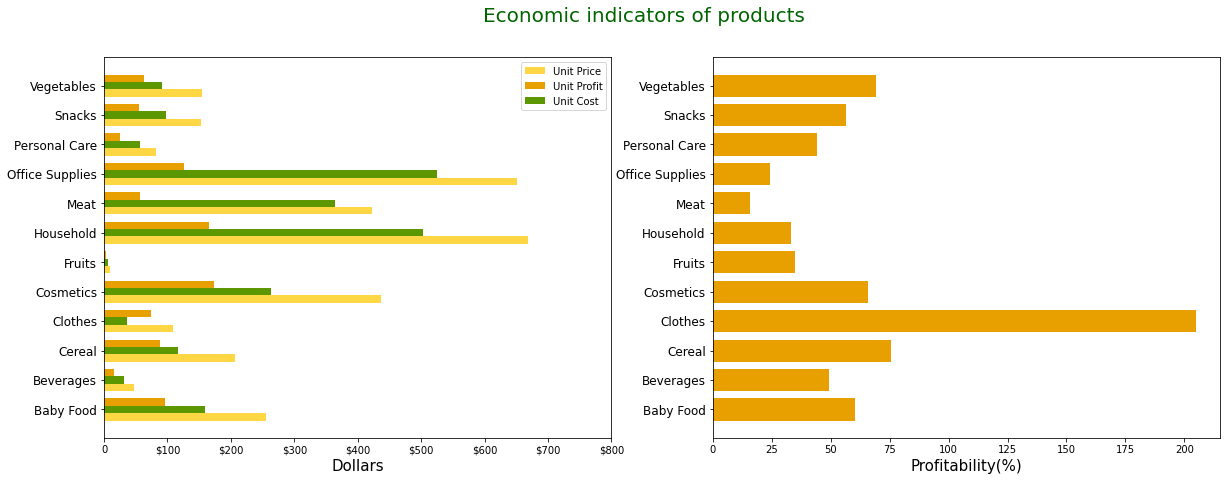

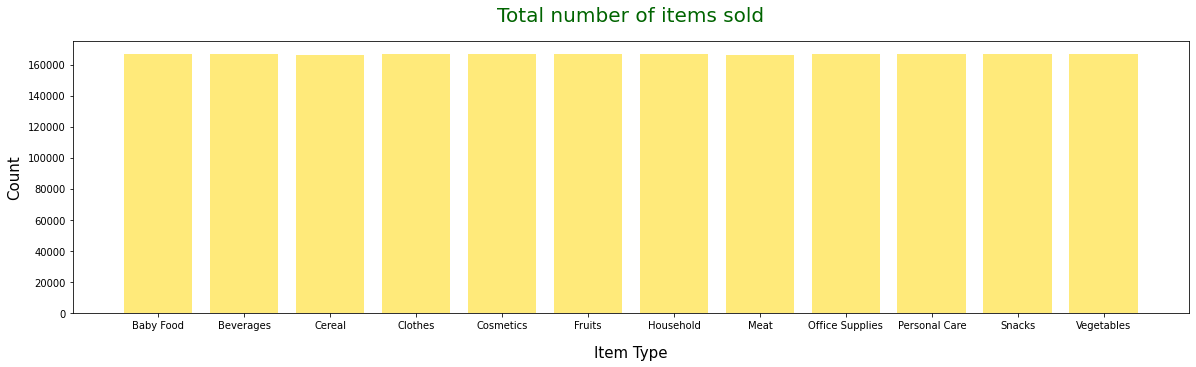

In [28]:
fig, ax = plt.subplots(figsize = (20, 7))
fig.suptitle('Economic indicators of products', fontsize=fonsize_title, color='#006400')

width = 0.25
y = np.arange(len(by_item_type['Item Type']))

plt.subplot(1,2,1)
plt.barh(y- 0.25, by_item_type['Unit Price'], width, color='#ffd643', label='Unit Price')
plt.barh(y+ 0.25, by_item_type['Unit Profit'], width, color='#e8a000', label='Unit Profit')
plt.barh(y, by_item_type['Unit Cost'], width, color='#5c9700', label='Unit Cost')
plt.yticks(y, by_item_type['Item Type'], fontsize=fonsize_y)
plt.xticks(np.arange(0, 801, step=100), ['0', '$100', '$200', '$300', '$400', '$500', '$600', '$700', '$800'],
                                         fontsize=10)
plt.xlabel('Dollars', fontsize=fonsize_label)
plt.legend()

plt.subplot(1,2,2)
width = 0.75
plt.barh(y, by_item_type['Profitability'], width, color='#e8a000', label='Profitability(%)')
plt.xlabel('Profitability(%)', fontsize=fonsize_label)
plt.yticks(y, by_item_type['Item Type'], fontsize=fonsize_x)
plt.show()

plt.figure(figsize=(20, 5))
counts =sales.groupby(['Item Type'], as_index=False)['Units Sold'].count()
plt.title('Total number of items sold', fontsize=fonsize_title, color=title_color, y = layout)
plt.bar(counts['Item Type'], counts['Units Sold'], color='#FFEA7A')
plt.ylabel('Count', fontsize=fonsize_label, labelpad=6)
plt.xlabel('Item Type', fontsize=15, labelpad=fonsize_label)
plt.show()

### 3 Features Correlating with Delivery Time

In [29]:
correlation = sales[['Delivery time', 'Order Priority', 'Region', 'Sales Channel', 'Item Type', 'Unit Price', 'Order Day', 'Order Month', 'Units Sold', ]]

In [ ]:
correlation.loc[:, ['Region']] = correlation['Region'].astype("category").cat.codes
correlation.loc[:, ['Item Type']] = correlation['Item Type'].astype("category").cat.codes
correlation.loc[:, ['Sales Channel']] = correlation['Sales Channel'].astype("category").cat.codes
correlation.loc[:, ['Order Day']] = correlation['Order Day'].astype("category").cat.codes
correlation.loc[:, ['Order Month']] = correlation['Order Month'].astype("category").cat.codes
correlation.loc[:, ['Order Priority']] = correlation['Order Priority'].astype("category").cat.codes

In [ ]:
# Converting 'Delivery time' column to numeric data type
correlation['Delivery time'] = correlation['Delivery time'].str.extract(r'(\d+)', expand=False)
correlation['Delivery time'] = pd.to_numeric(correlation['Delivery time'])

In [32]:
correlation

,Delivery time,Order Priority,Region,Sales Channel,Item Type,Unit Price,Order Day,Order Month,Units Sold
0,1,2,2,1,5,9.33,0,4,3866
1,28,3,4,0,6,668.27,0,4,151
2,40,3,3,1,10,152.58,0,4,6364
3,13,3,0,1,8,651.21,0,4,8151
4,36,0,2,1,10,152.58,0,4,368
...,...,...,...,...,...,...,...,...,...
1999995,49,0,6,0,0,255.28,4,11,1006
1999996,38,2,2,0,9,81.73,4,11,3505
1999997,10,1,6,0,8,651.21,4,11,3502
1999998,37,3,6,0,11,154.06,4,11,6431


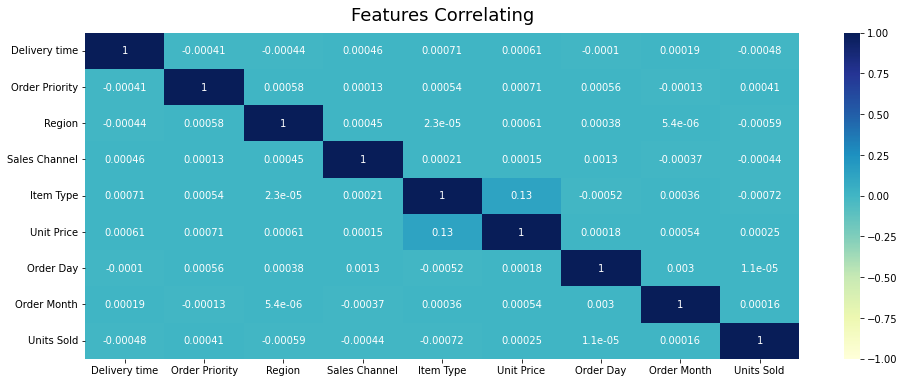

In [33]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(correlation.corr(), vmin=-1, vmax=1, annot=True, cmap='YlGnBu')
heatmap.set_title('Features Correlating', fontdict={'fontsize':18}, pad=12)
plt.show()

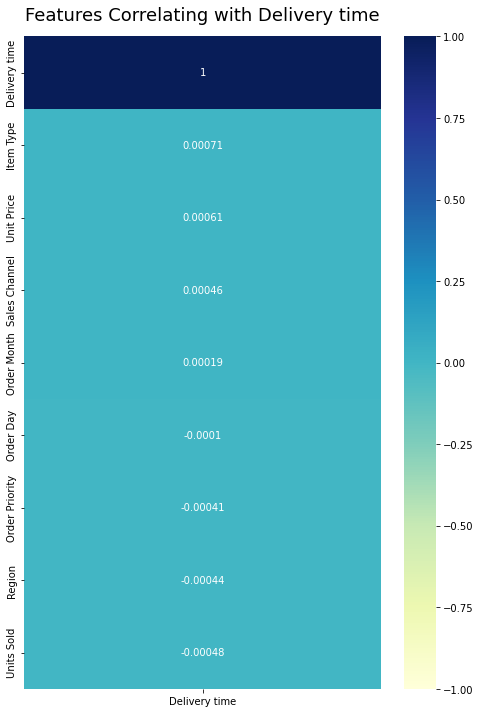

In [34]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(correlation.corr()[['Delivery time']].sort_values(by='Delivery time', ascending=False), vmin=-1, vmax=1, annot=True, cmap='YlGnBu')
heatmap.set_title('Features Correlating with Delivery time', fontdict={'fontsize':18}, pad=16)
plt.show()

# Result

#### After analyzing the dataset, it was found:
1. Between 2010 and 2019, there is no significant difference in sales volume, in 2020 sales volume decreased relative to previous periods.
2. The largest sales markets are Europe and Sub-Saharan Africa, the smallest - North America.
3. Online and offline volumes differ slightly.
4. Goods that bring the greatest revenue - "Household" and "Office Supplies", the lowest - "Fruits". The product with the highest profitability is “Clothes”.
5. There is no significant dependence of the Delivery time on other indicators.